In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: /Users/evanli/Documents/Bmi_NAS_evan/evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import json

In [3]:
def plot_target_other_pvl(result_dict, celltype, savepath=''):
    target_pvl = result_dict['Prevalence']
    other_pvl = result_dict['Other_prevalence']
    lmbd_range = np.exp(result_dict['log_lambda_range'])
    ratio = [target / (others + 1e-3) for target, others in zip(target_pvl, other_pvl)]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()
    ln1 = ax1.plot(lmbd_range, [100*p for p in target_pvl], marker='o', c = 'r', linestyle='--', label = 'Target Prevalence')
    ln2 = ax1.plot(lmbd_range, [100*p for p in other_pvl], marker='o', c = 'b', linestyle='--', label='Other Prevalence', zorder=1)
    ln3 = ax2.plot(lmbd_range, ratio, marker='o', c='orange', linestyle='--', label='Ratio')

    ax1.set_xlabel("lambda"); ax1.set_ylabel("Prevalence (%)")
    ax1.set(xscale="log")
    ax1.set_ylim(0, 110)
    ax2.set_ylabel('Ratio')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=[1, 1], loc='lower right')
    plt.subplots_adjust(top=0.8)
    plt.title('Prevalence of '+ celltype)
    # plt.show()
    if savepath:
        plt.savefig(savepath, dpi=300)

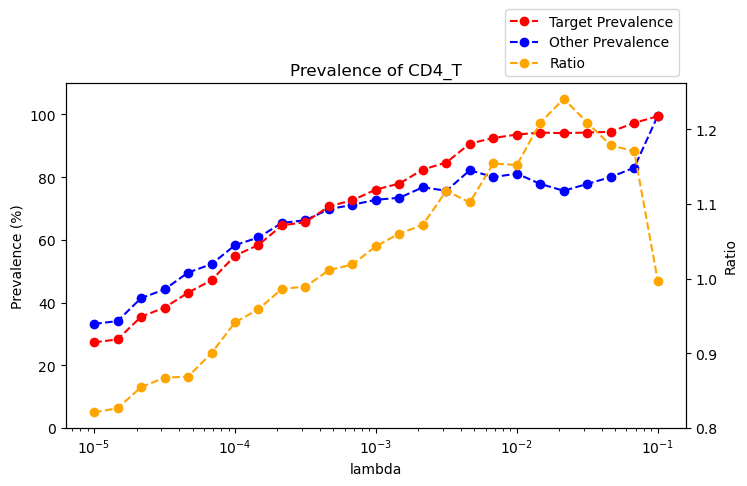

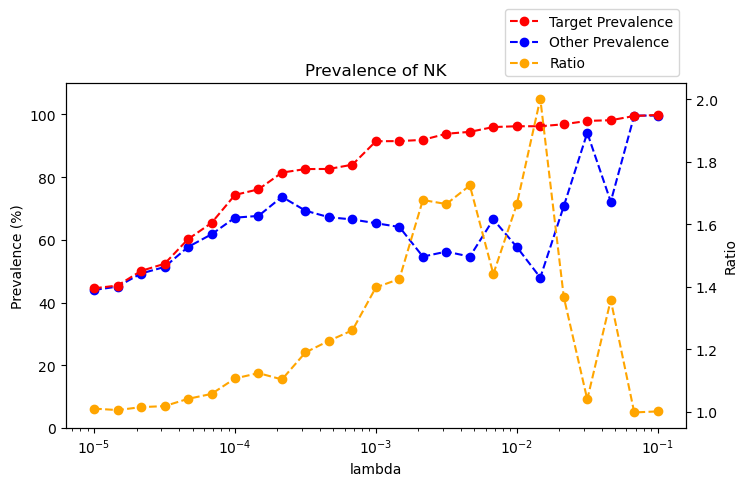

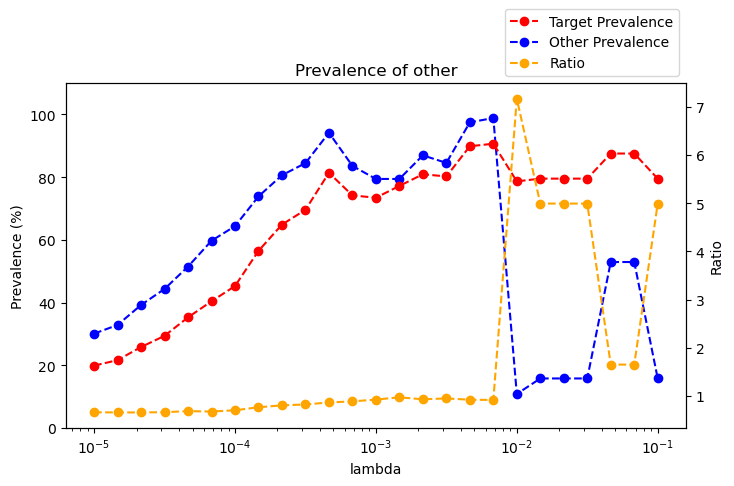

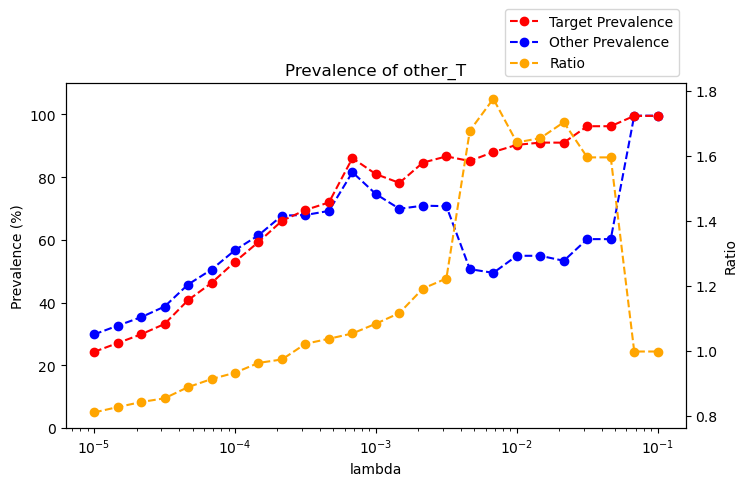

In [ ]:
# queue = ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']
queue = ['CD4_T', 'NK', 'other', 'other_T']
# output_path = r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\plot_target_other_pvl"
output_path = source_code_dir / 'PBMC_Hao_batch_noZ/Level1/plot_target_other_pvl'

# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_batch_noZ\Level1\tuning_other.pvl_cpu")
os.chdir(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/tuning_other.pvl_cpu')
for celltype in queue:
    file_name = f'{celltype}_tuning.json'
    if os.path.exists(file_name):
        with open(file_name, 'r') as f:
            result_dict = json.load(f)
    else:
        print('Skipping', celltype)
        continue
    
    plot_target_other_pvl(result_dict, celltype, savepath = output_path / f'{celltype}_target_other_pvl.png')